In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import datasets, layers, models

In [13]:
#getting the data from witin the keras library.
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()
#NOTE: we use tuples to store data like given above (think like it's an array-ish concept but you can store different data types.)
#also it can we descriped as a single "variable" used to store multiple values. 

#we wanna sclae the data down 0-1
training_images , testing_images = training_images / 255, testing_images/ 255
#this was for preparing the data

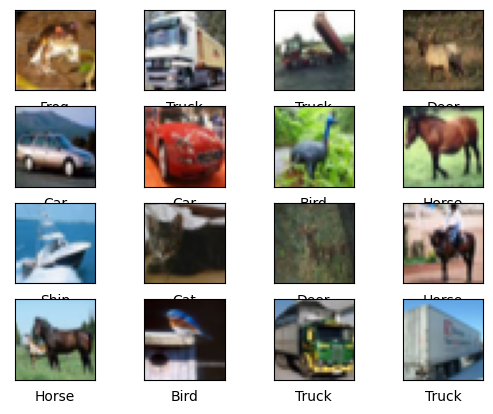

In [14]:
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog','Horse', 'Ship', 'Truck'] #this is the list for reconizing the classes

#now coding the grid for the images 
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
#this is for showing the images what the model reconized it with
#We can ee that theimages are pretty much pixelized so we have to see how we're going to fix that. 
plt.show()

In [15]:
#reducing the amount of images we're going to feed the neural network, for saving time and recources (note: for max accuracy you can use the whole dataset)
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [16]:
#building the neural network
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape= (32,32,3)))  #NOTE: the 3,3 and 2,2 are filters 
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu')) 
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax')) #10 units for 10 possible classifications
#a recap of softmax, it will get all the possible outcomes and scale it to 1 (or to a precentage)

#NOTE: a conv layer will filter the features of the image, for example: a cat has pointy ears, a horse has long legs, a plane has wings.
#The Maxpool will then reduce the image to the essential information.
#By doing this over and over again we will sort out each feature 

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images,testing_labels))
#recap of epochs, how many times the model is going to see the images over and over again. 

Epoch 1/10
625/625 [==============================] - 24s 37ms/step - loss: 1.7931 - accuracy: 0.3381 - val_loss: 1.5036 - val_accuracy: 0.4498
Epoch 2/10
625/625 [==============================] - 21s 33ms/step - loss: 1.4338 - accuracy: 0.4781 - val_loss: 1.3425 - val_accuracy: 0.5130
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 1.3123 - accuracy: 0.5299 - val_loss: 1.2589 - val_accuracy: 0.5455
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 1.1948 - accuracy: 0.5753 - val_loss: 1.2061 - val_accuracy: 0.5690
Epoch 5/10
625/625 [==============================] - 19s 30ms/step - loss: 1.1128 - accuracy: 0.6058 - val_loss: 1.1402 - val_accuracy: 0.6012
Epoch 6/10
625/625 [==============================] - 19s 30ms/step - loss: 1.0359 - accuracy: 0.6352 - val_loss: 1.0705 - val_accuracy: 0.6235
Epoch 7/10
625/625 [==============================] - 19s 30ms/step - loss: 0.9718 - accuracy: 0.6609 - val_loss: 1.0716 - val_accuracy:

In [17]:
#we want to test and save the model, once training and then load it
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {loss}")

model.save('image_classifier.model')


125/125 [==============================] - 1s 8ms/step - loss: 0.9906 - accuracy: 0.6543
Loss: 0.9906020760536194
Accuracy: 0.9906020760536194


INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


In [ ]:
#loading the trained model
model = models.load_model('image_classifier.model')

#now in the tutorial we got 4 images with 32x32 pixels, but i do not posses the editing software so the rest is not complete
img = cv.imread('jpg name') #NOTE: with open cv you load the image in bgr (not rgb) look out for that
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) #converting thr colour scheme from bgr to rgb

plt.imshow(img,cmap = plt.cm.binary) #showing the image

predicition = model.predict(np.array([img]) / 255)
index = np.argmax(predicition) #argmax will return the index of the max value 
print(f"Prediciton is {class_names[index]}")
 